# Import Libraries & Parameter
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams['figure.figsize'] = 20,20
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import Data
data = pd.read_csv('data.csv')
data.head(10)

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
5,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
6,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
7,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]
8,Antigua and Barbuda,18.9 [13.8-24.6],11.6 [6.4-18.6],25.9 [17.6-35.2],18.4 [13.5-23.8],11.2 [6.2-17.8],25.3 [17.3-34.3],18.0 [13.2-23.1],10.8 [6.1-17.1],24.8 [17.1-33.5],...,9.6 [5.0-16.1],6.0 [3.4-9.5],2.5 [0.9-5.4],9.3 [4.7-15.9],5.8 [3.2-9.3],2.4 [0.8-5.3],9.1 [4.4-15.7],5.6 [3.0-9.1],2.3 [0.8-5.1],8.8 [4.1-15.6]
9,Argentina,28.3 [23.4-33.5],27.3 [20.5-35.0],29.0 [22.5-36.0],27.8 [23.2-32.7],26.8 [20.2-34.1],28.5 [22.3-35.1],27.3 [22.9-32.0],26.2 [20.0-33.1],28.1 [22.1-34.4],...,14.1 [9.0-20.5],11.8 [8.2-16.0],9.6 [5.2-15.4],13.8 [8.6-20.3],11.5 [7.8-15.8],9.3 [4.9-15.3],13.5 [8.1-20.2],11.2 [7.5-15.7],9.0 [4.6-15.2],13.2 [7.7-20.1]


In [7]:
# Rename Column & Preform Pivot
df = data.copy()
df.rename(columns={'Unnamed: 0':'country'}, inplace=True)
df=df.melt(id_vars=['country'],var_name='year')

In [8]:
df

,country,year,value
0,NaN,2016,"Prevalence of obesity among adults, BMI &Great..."
1,NaN,2016,18+ years
2,Country,2016,Both sexes
3,Afghanistan,2016,5.5 [3.4-8.1]
4,Albania,2016,21.7 [17.0-26.7]
...,...,...,...
24943,Venezuela (Bolivarian Republic of),1975.2,13.2 [7.1-20.7]
24944,Viet Nam,1975.2,0.2 [0.1-0.5]
24945,Yemen,1975.2,4.2 [1.5-8.9]
24946,Zambia,1975.2,2.5 [1.0-5.1]


In [9]:
df = df.drop([0,1,2]).reset_index()
df = df.drop(columns = ['index'])
df[['year','gender']] = df['year'].str.split('.',expand=True)

In [10]:
df

,country,year,value,gender
0,Afghanistan,2016,5.5 [3.4-8.1],None
1,Albania,2016,21.7 [17.0-26.7],None
2,Algeria,2016,27.4 [22.5-32.7],None
3,Andorra,2016,25.6 [20.1-31.3],None
4,Angola,2016,8.2 [5.1-12.2],None
...,...,...,...,...
24940,Venezuela (Bolivarian Republic of),1975,13.2 [7.1-20.7],2
24941,Viet Nam,1975,0.2 [0.1-0.5],2
24942,Yemen,1975,4.2 [1.5-8.9],2
24943,Zambia,1975,2.5 [1.0-5.1],2


In [11]:
# Mapping the gender using the numbers we split
df['gender']=df['gender'].map({None:'both sex','1':'male','2':'female'})
df

,country,year,value,gender
0,Afghanistan,2016,5.5 [3.4-8.1],both sex
1,Albania,2016,21.7 [17.0-26.7],both sex
2,Algeria,2016,27.4 [22.5-32.7],both sex
3,Andorra,2016,25.6 [20.1-31.3],both sex
4,Angola,2016,8.2 [5.1-12.2],both sex
...,...,...,...,...
24940,Venezuela (Bolivarian Republic of),1975,13.2 [7.1-20.7],female
24941,Viet Nam,1975,0.2 [0.1-0.5],female
24942,Yemen,1975,4.2 [1.5-8.9],female
24943,Zambia,1975,2.5 [1.0-5.1],female


In [12]:
# Seperate BMI Values
df.rename(columns = {'value': 'BMI'}, inplace=True)
df_copy = df.copy()
df['BMI'] = df_copy['BMI'].str.split('[', expand=True)
df['lowest_est_BMI'] = df_copy['BMI'].str.split('[', expand=True)[1].str.split('-', expand=True)[0]
df['highest_est_BMI'] = df_copy['BMI'].str.split('[', expand=True)[1].str.split('-', expand=True)[1].str.split(']', expand=True)[0]

In [13]:
df

,country,year,BMI,gender,lowest_est_BMI,highest_est_BMI
0,Afghanistan,2016,5.5,both sex,3.4,8.1
1,Albania,2016,21.7,both sex,17.0,26.7
2,Algeria,2016,27.4,both sex,22.5,32.7
3,Andorra,2016,25.6,both sex,20.1,31.3
4,Angola,2016,8.2,both sex,5.1,12.2
...,...,...,...,...,...,...
24940,Venezuela (Bolivarian Republic of),1975,13.2,female,7.1,20.7
24941,Viet Nam,1975,0.2,female,0.1,0.5
24942,Yemen,1975,4.2,female,1.5,8.9
24943,Zambia,1975,2.5,female,1.0,5.1


In [14]:
# Reset the column order
df = df[['country', 'year', 'gender', 'BMI', 'lowest_est_BMI', 'highest_est_BMI']]
df

,country,year,gender,BMI,lowest_est_BMI,highest_est_BMI
0,Afghanistan,2016,both sex,5.5,3.4,8.1
1,Albania,2016,both sex,21.7,17.0,26.7
2,Algeria,2016,both sex,27.4,22.5,32.7
3,Andorra,2016,both sex,25.6,20.1,31.3
4,Angola,2016,both sex,8.2,5.1,12.2
...,...,...,...,...,...,...
24940,Venezuela (Bolivarian Republic of),1975,female,13.2,7.1,20.7
24941,Viet Nam,1975,female,0.2,0.1,0.5
24942,Yemen,1975,female,4.2,1.5,8.9
24943,Zambia,1975,female,2.5,1.0,5.1


In [15]:
df.describe()

,country,year,gender,BMI,lowest_est_BMI,highest_est_BMI
count,24695,24945,24945,24945,24066,24066
unique,196,42,3,607,526,668
top,Saint Kitts and Nevis,2015,female,No data,0.1,1.3
freq,126,594,8316,504,502,141


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24945 entries, 0 to 24944
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          24695 non-null  object
 1   year             24945 non-null  object
 2   gender           24945 non-null  object
 3   BMI              24945 non-null  object
 4   lowest_est_BMI   24066 non-null  object
 5   highest_est_BMI  24066 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [17]:
print(df[df.BMI=='No data'].country.value_counts())

Monaco         126
San Marino     126
Sudan          126
South Sudan    126
Name: country, dtype: int64


In [18]:
df1=df.dropna(subset=['country'])
df1=df1.drop(df[df.country=='Country'].index)
con=df1[df1.BMI=='No data'].country.value_counts().index
df2=df1[~df1.country.isin(con)]


In [19]:
df2

,country,year,gender,BMI,lowest_est_BMI,highest_est_BMI
0,Afghanistan,2016,both sex,5.5,3.4,8.1
1,Albania,2016,both sex,21.7,17.0,26.7
2,Algeria,2016,both sex,27.4,22.5,32.7
3,Andorra,2016,both sex,25.6,20.1,31.3
4,Angola,2016,both sex,8.2,5.1,12.2
...,...,...,...,...,...,...
24940,Venezuela (Bolivarian Republic of),1975,female,13.2,7.1,20.7
24941,Viet Nam,1975,female,0.2,0.1,0.5
24942,Yemen,1975,female,4.2,1.5,8.9
24943,Zambia,1975,female,2.5,1.0,5.1


In [20]:
df2['BMI'] = pd.to_numeric(df2['BMI'], errors = 'coerce')
df2['lowest_est_BMI'] = pd.to_numeric(df2['lowest_est_BMI'], errors = 'coerce')
df2['highest_est_BMI'] = pd.to_numeric(df2['highest_est_BMI'], errors = 'coerce')


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 0 to 24944
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          24066 non-null  object 
 1   year             24066 non-null  object 
 2   gender           24066 non-null  object 
 3   BMI              24066 non-null  float64
 4   lowest_est_BMI   24066 non-null  float64
 5   highest_est_BMI  24066 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.3+ MB


In [17]:
df2.year.value_counts().sort_index()

1975    573
1976    573
1977    573
1978    573
1979    573
1980    573
1981    573
1982    573
1983    573
1984    573
1985    573
1986    573
1987    573
1988    573
1989    573
1990    573
1991    573
1992    573
1993    573
1994    573
1995    573
1996    573
1997    573
1998    573
1999    573
2000    573
2001    573
2002    573
2003    573
2004    573
2005    573
2006    573
2007    573
2008    573
2009    573
2010    573
2011    573
2012    573
2013    573
2014    573
2015    573
2016    573
Name: year, dtype: int64

In [18]:
df2.gender.value_counts()


both sex    8022
female      8022
male        8022
Name: gender, dtype: int64

In [19]:
# EDA

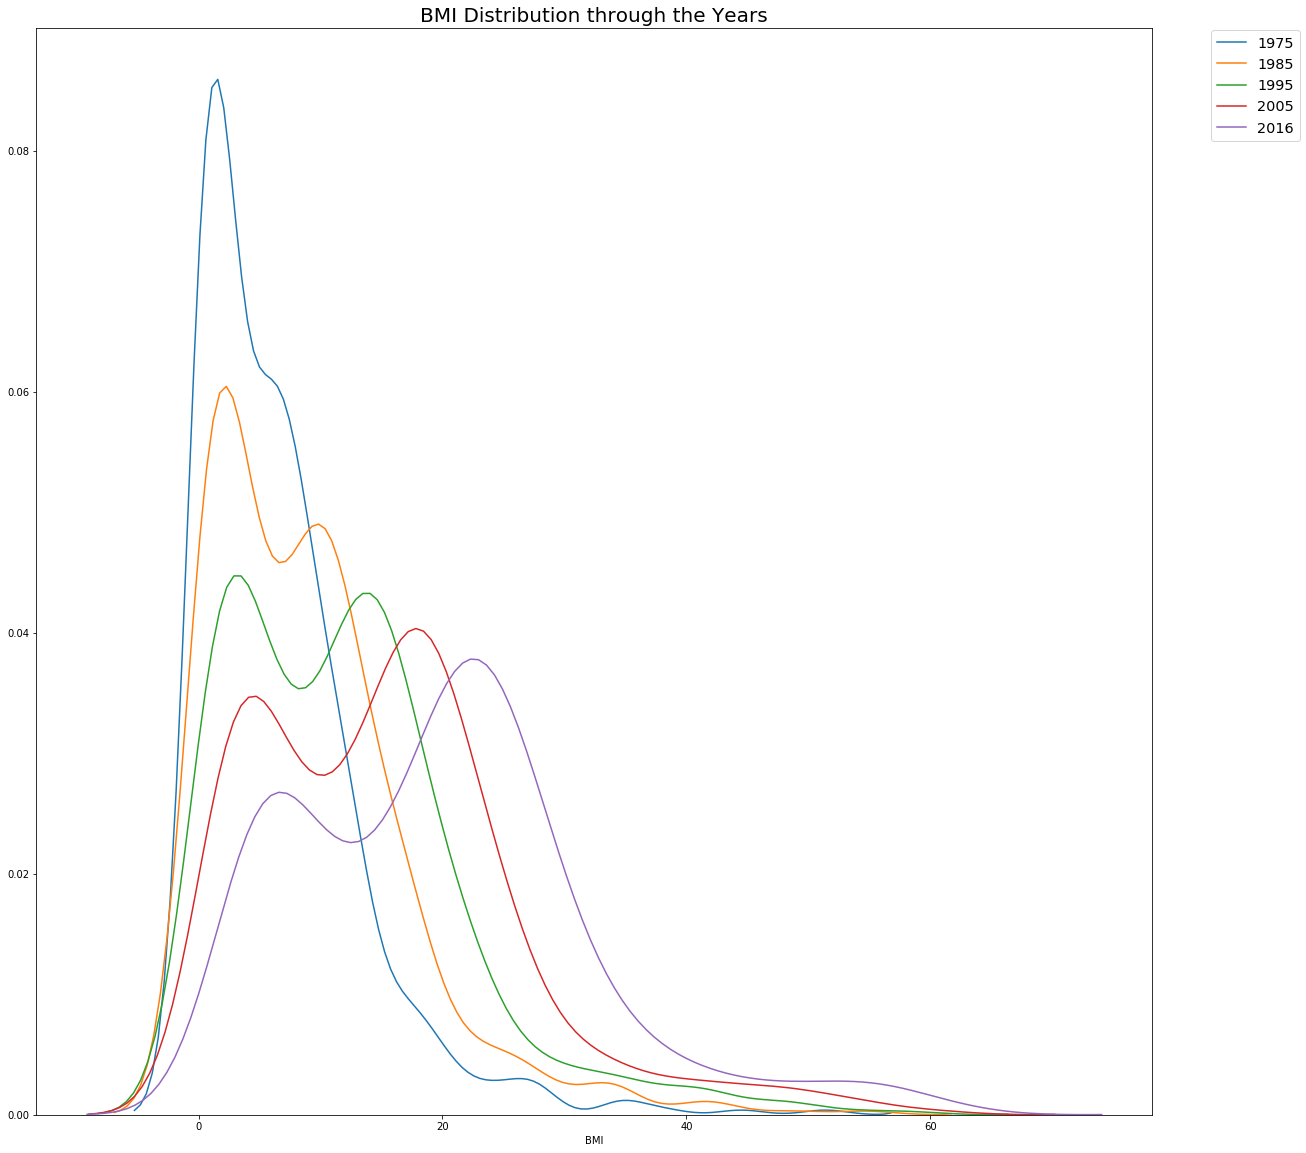

In [20]:
# Distribution Every 10 Years

sns.distplot(df2[df2.year=='1975'].BMI,hist=False,label='1975')
sns.distplot(df2[df2.year=='1985'].BMI,hist=False,label='1985')
sns.distplot(df2[df2.year=='1995'].BMI,hist=False,label='1995') 
sns.distplot(df2[df2.year=='2005'].BMI,hist=False,label='2005') 
sns.distplot(df2[df2.year=='2016'].BMI,hist=False,label='2016')

plt.title('BMI Distribution through the Years',size=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2, fontsize = 'x-large')

plt.show()

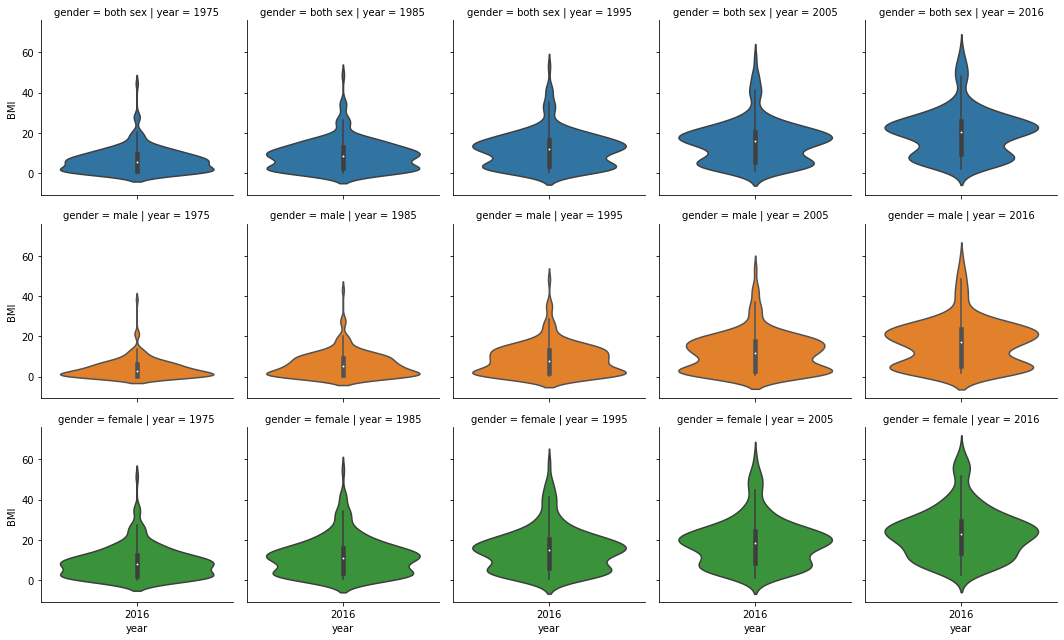

In [21]:
data_temp=df2[df2.year.isin(['1975','1985','1995','2005','2016'])]
g = sns.FacetGrid(data_temp, row = 'gender', col = 'year', hue = 'gender')
g = g.map(sns.violinplot, 'year', 'BMI')
plt.show()

In [22]:
df3 = df2[df2.gender=='both sex'].sort_values("BMI", ascending=False).groupby("year").head(10).sort_values('year')
df3 = df3.replace(to_replace=r'Micronesia (Federated States of)', value='Micronesia')
df3 = df3.sort_values(by=['BMI'], ascending = False)
df3

,country,year,gender,BMI,lowest_est_BMI,highest_est_BMI
119,Nauru,2016,both sex,61.0,55.3,66.6
713,Nauru,2015,both sex,60.7,55.2,66.1
1307,Nauru,2014,both sex,60.3,55.0,65.6
1901,Nauru,2013,both sex,60.0,54.9,65.1
2495,Nauru,2012,both sex,59.6,54.6,64.6
...,...,...,...,...,...,...
24480,Niue,1975,both sex,18.9,12.4,26.3
24465,Micronesia,1975,both sex,18.9,12.8,25.7
24445,Kuwait,1975,both sex,18.6,13.8,24.1
23940,Tuvalu,1976,both sex,18.6,12.6,25.5


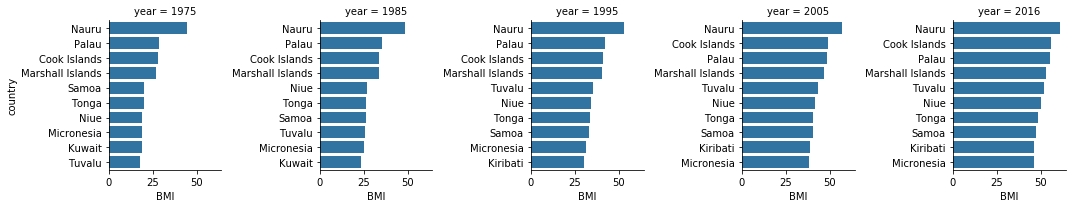

In [23]:
data_temp1=df3[df3.year.isin(['1975','1985','1995','2005','2016'])]
g = sns.FacetGrid(data_temp1, col = 'year', sharey=False)
g = g.map(sns.barplot, 'BMI', 'country')
plt.show()

In [24]:
# Exporting File to CSV for further Anaylsis on Tableau
df2.to_csv('1975-2016_Global_Obesity.csv')